## Exploring Relationships for medical costs

### Import

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [9]:
matplotlib.__version__

'3.7.1'

In [3]:
%matplotlib inline

In [4]:
# establish path
path = '/Users/ngawangdhundup/Documents/Career Foundry Bootcamp/DM 6'

In [5]:
# Import dataframes
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','insurance_clean.csv'), index_col = 0)

In [6]:
df.head(1)

age     sex   bmi  children smoker     region    charges
0   19  female  27.9         0    yes  southwest  16884.924

In [7]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [21]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Data Cleaning

In [10]:
# Rename columns
# Check data types (df.dtypes)
# Check for missing values
# Check for duplicates
# Check for mixed data types

### Exploring Relationships

In [12]:
# Create a correlation matirx using pandas

df.corr()

/var/folders/f1/9l5c1gh11fg31qkvvqmyx9mc0000gn/T/ipykernel_91626/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000

/var/folders/f1/9l5c1gh11fg31qkvvqmyx9mc0000gn/T/ipykernel_91626/2438265331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


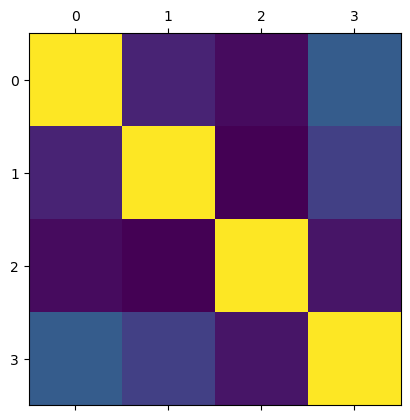

In [13]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

/var/folders/f1/9l5c1gh11fg31qkvvqmyx9mc0000gn/T/ipykernel_91626/2521877551.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


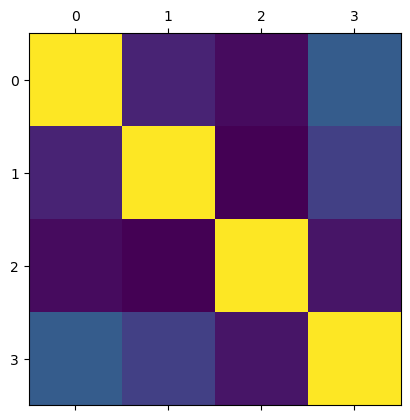

In [14]:
# Save figure

plt.matshow(df.corr())
plt.savefig("out.png")

In [15]:
# current dir
cwd = os.getcwd()
cwd

'/Users/ngawangdhundup/Documents/Career Foundry Bootcamp/DM 6/03 Scripts'

/var/folders/f1/9l5c1gh11fg31qkvvqmyx9mc0000gn/T/ipykernel_91626/368310021.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(), fignum=f.number) # type of plot


Text(0.5, 1.0, 'Correlation Matrix')

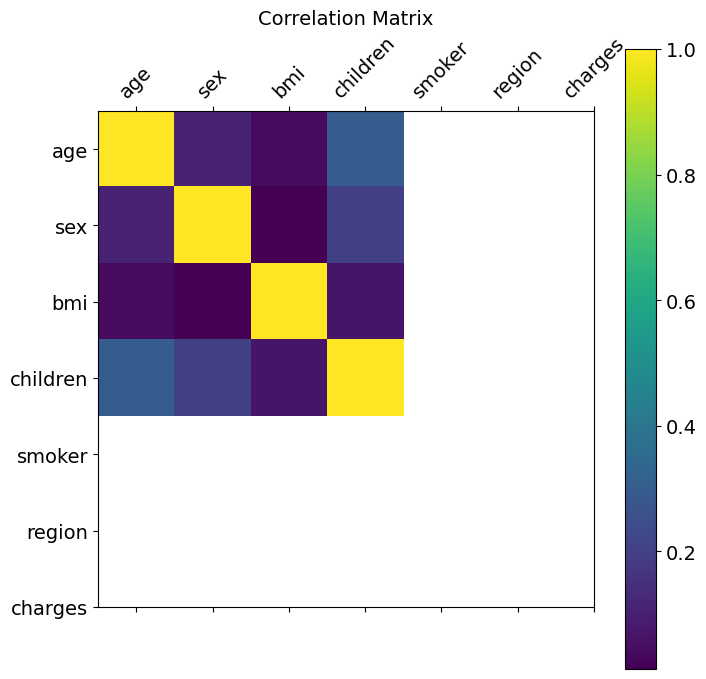

In [20]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8,8)) #fig size
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # adds a color legend
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

The correlation heatmap shows the relationship between each variable, the yellow diagnols are ignorable because they are relating to each other. The other colors represent the strength or coefficient to each other. Smoker, region, and sex are missing because they are quantitative variables and dont have numbers to relate to the other qualitative variables. 

### Correlation heatmap using seaborn

In [40]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Cost category'],
      dtype='object')

In [23]:
# Create a subset excluding unused columns

sub = df[['age', 'bmi', 'children', 'charges']]
sub

age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1337 rows x 4 columns]

##### Figure 1 ( correlation heatmap)

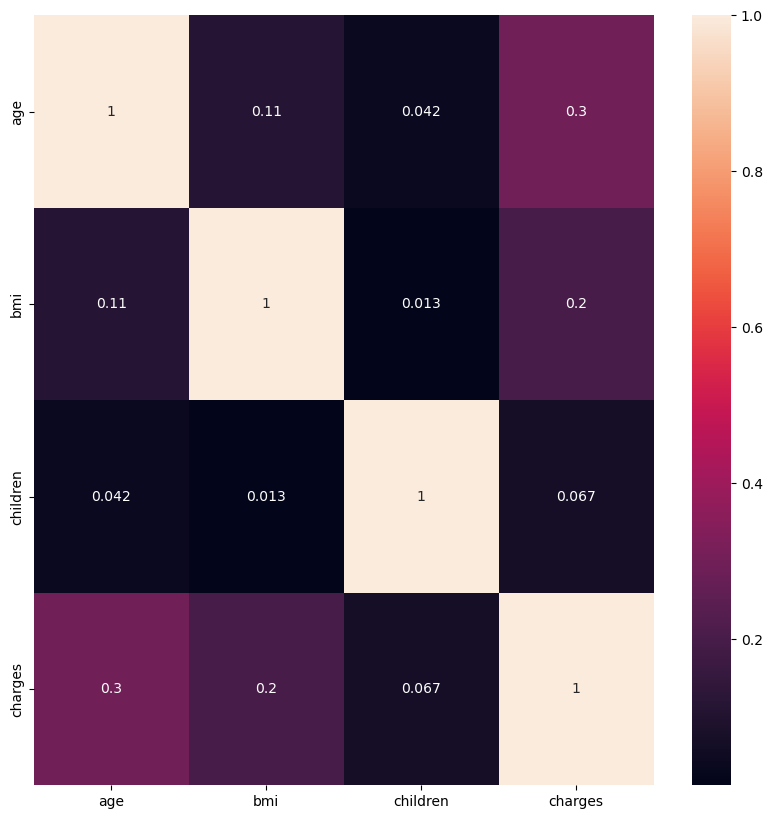

In [24]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above
corr = sns.heatmap(sub.corr(), annot = True, ax =ax)

Higher the number means stronger the coefficent or relationship between the 2 variables. For example children and bmi have a very low number of 0.013, which makes sense because bmi doesnt really have a relationship with whether you have children or not. 

### Scatterplots

##### Figure 2 ( scatterplot for age vs charges)

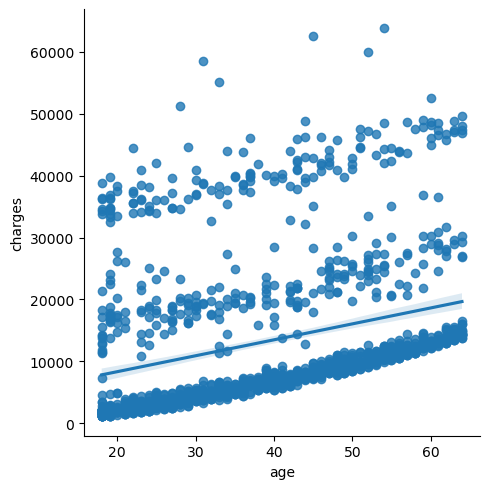

In [25]:
# Create a scatterplot for the 'age' and 'charges' column in seaborn
sns.lmplot(x = 'age', y = 'charges', data =df)

This shows there is a direct linear relationship between age and charges, medical costs. The higher the age higher the charge. 

### Pair Plots

In [26]:
# Creating another sub for variables using for pair plot

sub_2 = sub[['age', 'bmi', 'children', 'charges']]

##### Figure 3. ( pairplots)

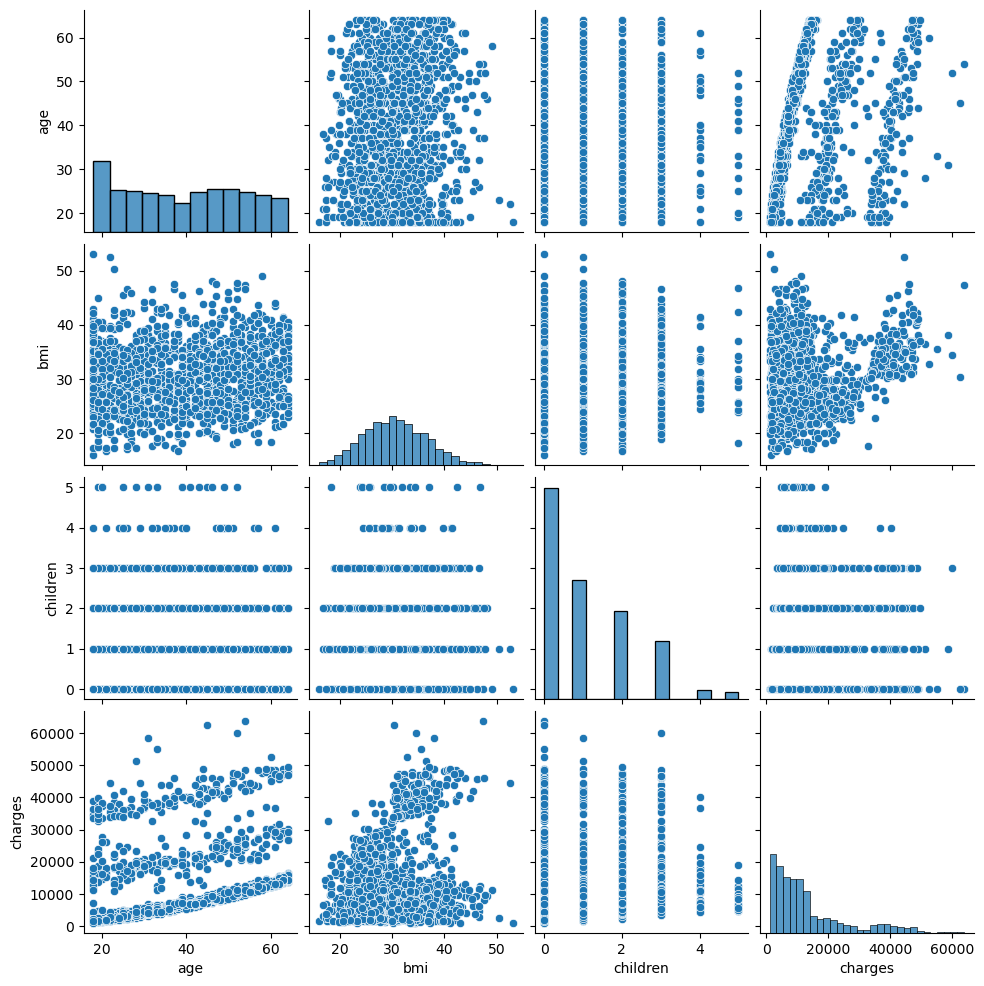

In [28]:
# Create a pair plot

g = sns.pairplot(sub_2)

This graph shows a scatter plot when comparing two different variables, and a histogram when its only one variable. I would like to explore the relationship between age and bmi further. 

### Categorical Plots

<Axes: xlabel='charges', ylabel='Count'>

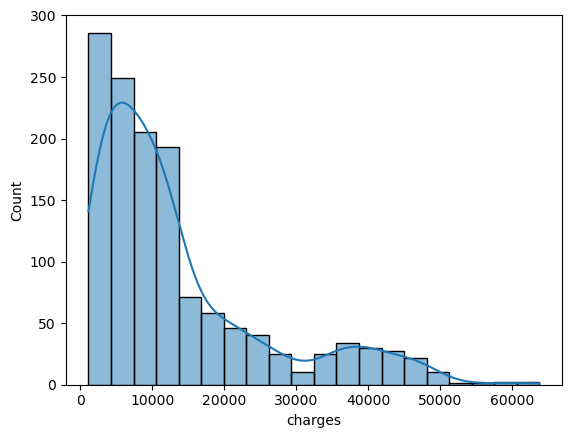

In [35]:
# Use a histogram to visualize the distribution of the variables.
# create categories or subgroups to divide charges

sns.histplot(df['charges'], bins = 20, kde = True)

There are higher counts of medical charges for lower cost categories and slopes downward the higher the cost. 

In [36]:
df.loc[df['charges'] < 10000, 'Cost category'] = 'Low Cost'

In [37]:
df.loc[(df['charges'] >= 10000) & (df['charges'] < 30000), 'Cost category'] = 'Middle Cost'

In [38]:
df.loc[df['charges'] >= 30000, 'Cost category'] = 'High Cost'

In [42]:
df['Cost category'].value_counts(dropna = False)

Low Cost       711
Middle Cost    464
High Cost      162
Name: Cost category, dtype: int64

In [41]:
df.head(1)

age     sex   bmi  children smoker     region    charges Cost category
0   19  female  27.9         0    yes  southwest  16884.924   Middle Cost

##### Figure 4. ( smoker plot)

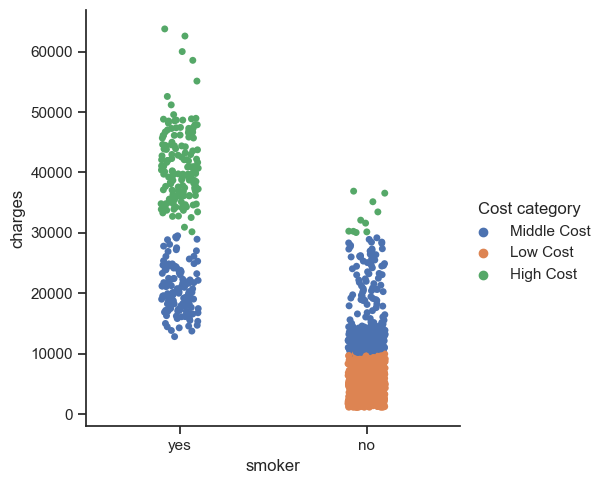

In [49]:
# Create a categorical plot in seaborn using the cost categories created above

sns.set(style="ticks")
smo = sns.catplot(x="smoker", y="charges", hue="Cost category", data=df)

If the insurance beneficiary is a smoker, they are the middle and higher brackets for cost, while non smokers appear to have all 3 brackets, with the density aggregating towards low cost. 

##### Figure 5. ( sex plot)

In [46]:
sns.set(style="ticks")
sex = sns.catplot(x="sex", y="charges", hue="Cost category", data=df)

There appears to be no differentiation between sex for medical costs. 

##### Figure 6. ( region plot)

In [47]:
sns.set(style="ticks")
reg = sns.catplot(x="region", y="charges", hue="Cost category", data=df)

There appears to be no differentiation between regrion for medical costs. 

In [50]:
# fig = smo.get_figure()
smo.savefig("smoker cost.png") 
sex.savefig("sex cost.png") 
reg.savefig("region cost.png") 

## Task Discussions

### 1. What factors contribute the most and least to medical cost?
According to figure 1, the correlation matrix, all of the variables have a low coefficient but the number of children has the least factor at 0.67, and the age has the highest coefficent at 0.3. This point is supported by figure 2, scatterplot of age vs medical charge, where there is a linear correlation between increasing age and medical cost. It is difficult to determine the other factors, due to the fact sex, region, smoker are quantitive values and unable to be used in the correlation matrix. 

### 2. What region has the most and least insurance costs?
According to figure 6, region categorical plot, medical costs are equal througout the 4 regions

### 3. Does bmi or physical fitness affect medical costs?
According to figure 3 and 1, bmi has nothing to do with medical charges

### 4. Do gender affect medical costs?
According to figure 5, sex vs charges categorical plot, medical costs are not affected by gender/sex





### Hypothesis

1. Age is the number one factor for higher medical costs
2. Smoking is one of the major factors for increased medical costs for insurance agencies
3. Where you live affects your insurance costs

## Export